


Epoch 1/20


94/94 [==============================] - 1s 6ms/step - loss: 0.7783 - accuracy: 0.7446 - val_loss: 0.5040 - val_accuracy: 0.8278
Epoch 2/20
94/94 [==============================] - 0s 4ms/step - loss: 0.4684 - accuracy: 0.8384 - val_loss: 0.4428 - val_accuracy: 0.8456
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 0.4163 - accuracy: 0.8532 - val_loss: 0.4095 - val_accuracy: 0.8578
Epoch 4/20
94/94 [==============================] - 0s 5ms/step - loss: 0.3892 - accuracy: 0.8631 - val_loss: 0.4061 - val_accuracy: 0.8558
Epoch 5/20
94/94 [==============================] - 0s 4ms/step - loss: 0.3666 - accuracy: 0.8699 - val_loss: 0.3723 - val_accuracy: 0.8660
Epoch 6/20
94/94 [==============================] - 0s 4ms/step - loss: 0.3467 - accuracy: 0.8767 - val_loss: 0.3776 - val_accuracy: 0.8631
Epoch 7/20
94/94 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.8805 - val_loss: 0.3561 - val_accuracy: 0.8752
Epoch 8/20
94/9

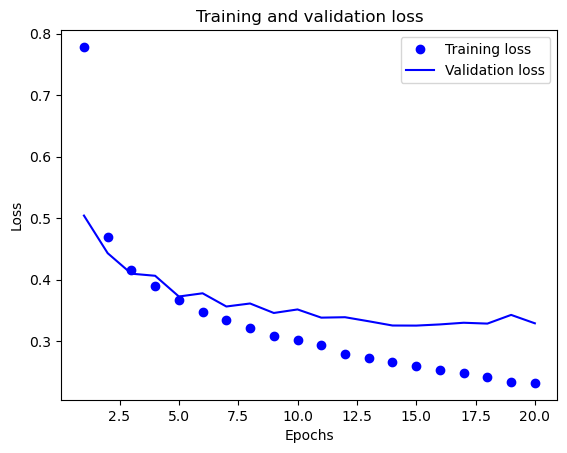

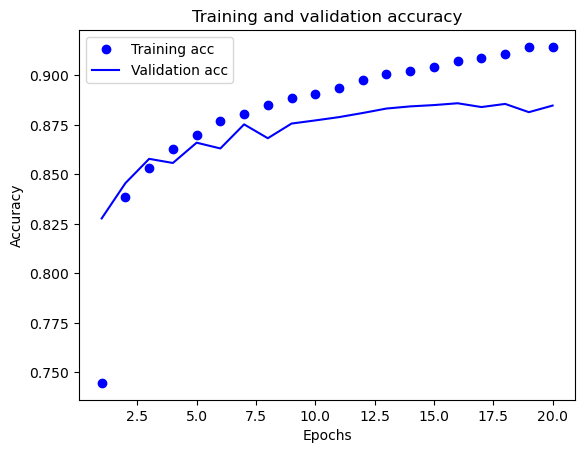

In [1]:
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Створення моделі
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
# Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Навчання моделі
history = model.fit(
    train_images, train_labels, epochs=20, batch_size=512, validation_split=0.2
)

# Оцінка моделі на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(history_dict["accuracy"]) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plt.clf()
val_acc_values = history_dict["val_accuracy"]
plt.plot(epochs, history_dict["accuracy"], "bo", label="Training acc")
plt.plot(epochs, history_dict["val_accuracy"], "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Ми отримали 

Test accuracy: 0.8754000067710876

Це поганий результат.
Дивлячись на графіки які нагадують $\sqrt{x}$, варіювання кількості діб могло би збільшити точність лише на дуже невелике число, а нам потрібний більш відчутний стрибок.

Збільшимо кількість шарів.

Epoch 1/30
1688/1688 [==============================] - 7s 3ms/step - loss: 0.5550 - accuracy: 0.8010 - val_loss: 0.4319 - val_accuracy: 0.8497
Epoch 2/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3850 - accuracy: 0.8591 - val_loss: 0.3796 - val_accuracy: 0.8625
Epoch 3/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3465 - accuracy: 0.8737 - val_loss: 0.3819 - val_accuracy: 0.8605
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3211 - accuracy: 0.8802 - val_loss: 0.3473 - val_accuracy: 0.8713
Epoch 5/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3028 - accuracy: 0.8883 - val_loss: 0.3477 - val_accuracy: 0.8710
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2880 - accuracy: 0.8931 - val_loss: 0.3465 - val_accuracy: 0.8752
Epoch 7/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2763 - accuracy: 0.8974 - val_loss: 0.3371 - val_accuracy:

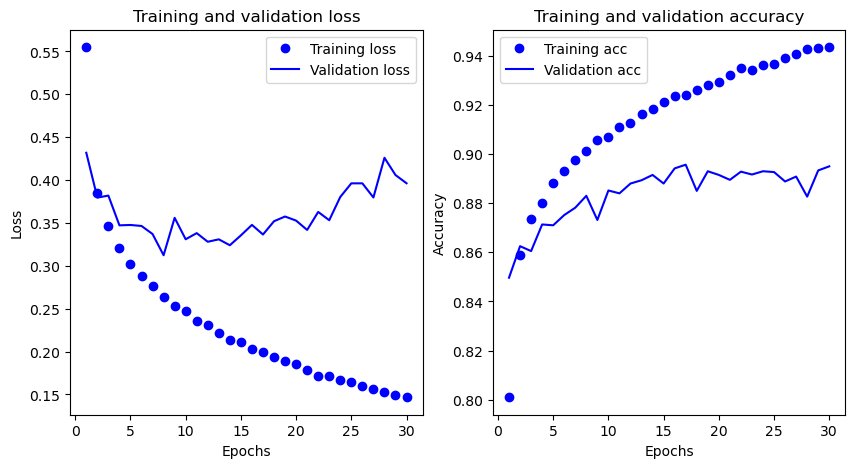

In [26]:
def train_and_evaluate_model(epochs = 30, batch_size = 32):
    # Створення моделі
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    # Компіляція моделі
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Навчання моделі
    history = model.fit(
        train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1
    )

    # Оцінка моделі на тестових даних
    test_loss, test_acc = model.evaluate(test_images, test_labels)

    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    epochs = range(1, len(history_dict["accuracy"]) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].plot(epochs, loss_values, "bo", label="Training loss")
    axs[0].plot(epochs, val_loss_values, "b", label="Validation loss")
    axs[0].set_title("Training and validation loss")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].legend()

    val_acc_values = history_dict["val_accuracy"]
    axs[1].plot(epochs, history_dict["accuracy"], "bo", label="Training acc")
    axs[1].plot(epochs, history_dict["val_accuracy"], "b", label="Validation acc")
    axs[1].set_title("Training and validation accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()

    print(f"Test accuracy: {test_acc}")

    plt.show()


train_and_evaluate_model()

Результат все ще незадовільний, і втрати схоже тільки ростуть з одного моменту, хоча зменшення validation_split до 0.1 допомогло трохи збільшити точність. Мабуть, це може пояснюватись розміром цього датасету - більша пропорція даних виділена на навчання виявилась відчутною.

Epoch 1/120
211/211 [==============================] - 3s 11ms/step - loss: 0.9187 - accuracy: 0.6908 - val_loss: 0.5630 - val_accuracy: 0.7810
Epoch 2/120
211/211 [==============================] - 2s 10ms/step - loss: 0.5222 - accuracy: 0.8120 - val_loss: 0.4420 - val_accuracy: 0.8407
Epoch 3/120
211/211 [==============================] - 2s 10ms/step - loss: 0.4538 - accuracy: 0.8368 - val_loss: 0.4097 - val_accuracy: 0.8530
Epoch 4/120
211/211 [==============================] - 2s 10ms/step - loss: 0.4139 - accuracy: 0.8483 - val_loss: 0.3877 - val_accuracy: 0.8592
Epoch 5/120
211/211 [==============================] - 2s 9ms/step - loss: 0.3866 - accuracy: 0.8591 - val_loss: 0.3797 - val_accuracy: 0.8598
Epoch 6/120
211/211 [==============================] - 2s 9ms/step - loss: 0.3649 - accuracy: 0.8668 - val_loss: 0.3600 - val_accuracy: 0.8717
Epoch 7/120
211/211 [==============================] - 2s 9ms/step - loss: 0.3490 - accuracy: 0.8722 - val_loss: 0.3486 - val_accuracy: 0.

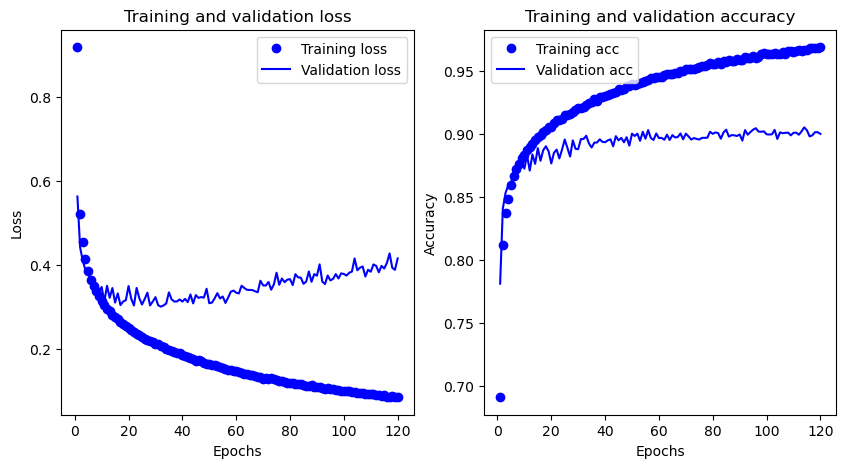

In [70]:
def train_and_evaluate_model(epochs=120, batch_size=256):
    # Створення моделі
    model = models.Sequential(
        [
            layers.Flatten(input_shape=(28, 28, 1)),
            layers.Dense(512, activation="relu"),
            layers.Dropout(0.2),
            layers.Dense(256, activation="sigmoid"),
            layers.Dropout(0.2),
            layers.Dense(128, activation="tanh"),
            layers.Dropout(0.2),
            layers.Dense(64, activation="sigmoid"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    # Компіляція моделі
    model.compile(
        optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
    )

    # Навчання моделі
    history = model.fit(
        train_images,
        train_labels,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
    )

    # Оцінка моделі на тестових даних
    test_loss, test_acc = model.evaluate(test_images, test_labels)

    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    epochs = range(1, len(history_dict["accuracy"]) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].plot(epochs, loss_values, "bo", label="Training loss")
    axs[0].plot(epochs, val_loss_values, "b", label="Validation loss")
    axs[0].set_title("Training and validation loss")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].legend()

    val_acc_values = history_dict["val_accuracy"]
    axs[1].plot(epochs, history_dict["accuracy"], "bo", label="Training acc")
    axs[1].plot(epochs, history_dict["val_accuracy"], "b", label="Validation acc")
    axs[1].set_title("Training and validation accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()

    print(f"Test accuracy: {test_acc}")

    plt.show()


train_and_evaluate_model()

Ось таким от змішаним підходом вдалось трошки наблизити 91%. 

Підбор параметрів вручну займає дуже багато часу і вимагає певної інтуїції, якої мені поки що бракує. Та і така кількість діб уж занадто велика.

Цю задачу значно краще вирішувати зі згортками явно. 